In [22]:
import confluent_kafka
import time
import uuid
import pandas as pd
import seaborn as sns
import collections
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
msg_count = 1000
iteration=60
consumer_timings = {}
consumer_messages={}
bootstrap_servers = 'localhost:9092'

In [24]:
def confluent_kafka_consumer_performance(msg_count):
    
    topic = 'confluent-kafka-topic'
    msg_consumed_count = 0
    conf = {'bootstrap.servers': bootstrap_servers,
            'group.id': uuid.uuid1(),
            'session.timeout.ms': 6000,
            'default.topic.config': {
                'auto.offset.reset': 'earliest'
            }
    }

    consumer = confluent_kafka.Consumer(**conf)

    consumer_start = time.time()
    # This is the same as pykafka, subscribing to a topic will start a background thread
    consumer.subscribe([topic])

    while True:
        msg = consumer.poll(1)
        if msg:
            msg_consumed_count += 1
                         
        if msg_consumed_count >= msg_count:
            break
                    
    consumer_timing = time.time() - consumer_start
    consumer.close()    
    return consumer_timing


def calculate_thoughput(timing, n_messages=10000, msg_size=100):
    print("Processed {0} messsages in {1:.2f} seconds".format(n_messages, timing))
    print("{0:.2f} MB/s".format((msg_size * n_messages) / timing / (1024*1024)))
    print("{0:.2f} Msgs/s".format(n_messages / timing))


In [25]:
for i in range(iteration):
    #_ = confluent_kafka_consumer_performance(msg_count) # Warm cache
    time_t=confluent_kafka_consumer_performance(msg_count)
    consumer_timings[msg_count] = time_t
    consumer_messages[msg_count]=msg_count/time_t
    msg_count=msg_count+1000
    #calculate_thoughput(consumer_timings['confluent_kafka_consumer'])

In [26]:
total_num_mes=0
for item in consumer_messages:
    total_num_mes=consumer_messages[item] + total_num_mes
avg=total_num_mes/iteration    
print("After Taking avergae number of messages read per second ::",avg)

After Taking avergae number of messages read per second :: 471888.34643314994


In [27]:
jr=1
for i in consumer_messages:
    print('(',i,',',int(consumer_messages[i]),')',sep='')
    jr=jr+1
    

(29000,495762)
(32000,595329)
(37000,550176)
(18000,503773)
(34000,431606)
(57000,577503)
(26000,436186)
(23000,521417)
(5000,176642)
(15000,537777)
(60000,550097)
(58000,569467)
(10000,450080)
(52000,302492)
(20000,394804)
(30000,520464)
(44000,508764)
(59000,557594)
(25000,547424)
(47000,504004)
(36000,493086)
(14000,526379)
(21000,438844)
(12000,474938)
(31000,500999)
(41000,429254)
(35000,509197)
(49000,587075)
(55000,570782)
(33000,528724)
(22000,473947)
(8000,530815)
(4000,154570)
(46000,512127)
(13000,524161)
(17000,467724)
(51000,322858)
(2000,194432)
(11000,437101)
(50000,603641)
(43000,493258)
(39000,527292)
(56000,501337)
(28000,510733)
(42000,584663)
(48000,510369)
(54000,556243)
(19000,466981)
(1000,21398)
(6000,246221)
(53000,527085)
(38000,511704)
(9000,571137)
(40000,510321)
(3000,157712)
(24000,510732)
(7000,481747)
(27000,494890)
(16000,589144)
(45000,528291)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd004d2978>],
      dtype=object)

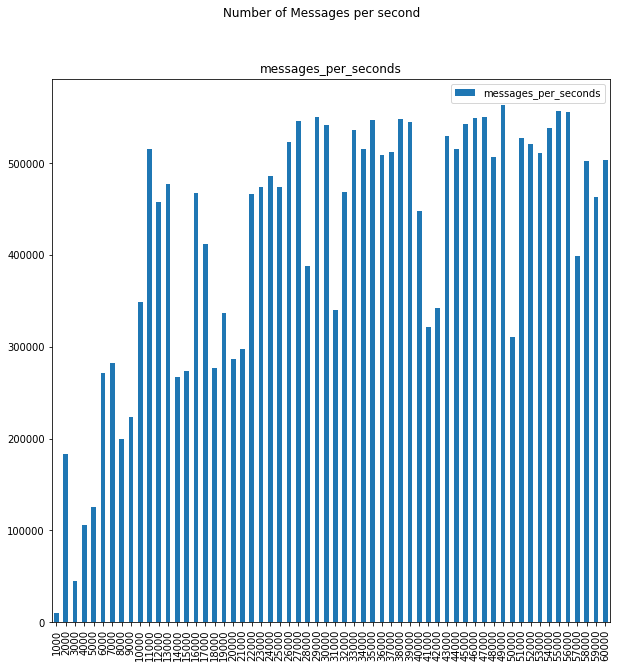

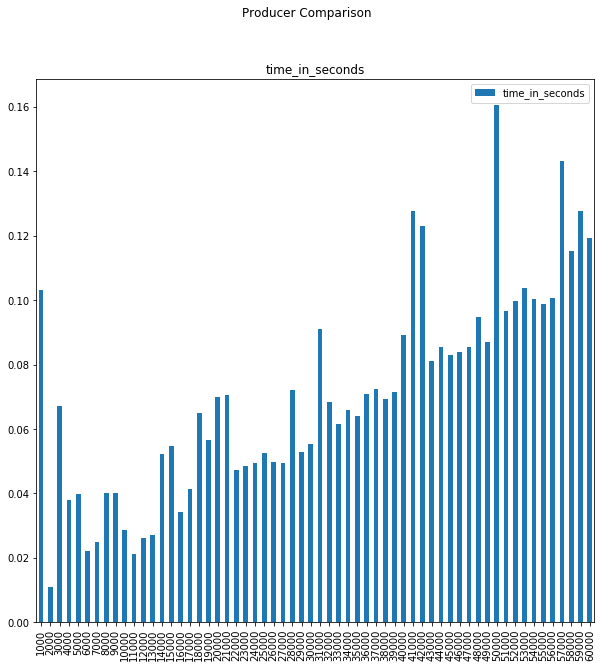

In [7]:
consumer_df = pd.DataFrame.from_dict(consumer_timings, orient='index').rename(columns={0: 'time_in_seconds'})
consumer_df1 = pd.DataFrame.from_dict(consumer_messages, orient='index').rename(columns={0: 'messages_per_seconds'})

consumer_df1.sort_index(inplace=True)
consumer_df1
consumer_df1.plot(kind='bar', subplots=True, figsize=(10, 10), title="Number of Messages per second")

consumer_df.sort_index(inplace=True)
consumer_df
consumer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Producer Comparison")
